In [86]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.linear_model import LinearRegression

In [19]:
data_val = DataFrame()
data_val = pd.read_csv("Carrier_24AHA424A30.csv")  # open works

IDB = np.array(data_val['IDB'])
ODB = np.array(data_val['ODB'])
IWB = np.array(data_val['IWB'])
Q_tot = np.array(data_val['Q_tot'])
Q_sen = np.array(data_val['Q_sens'])
W = np.array(data_val['W'])
SHR = np.array(data_val['SHR'])

df = pd.DataFrame({
    'IDB': IDB,
    'ODB': ODB,
    'IWB': IWB,
    'Q_tot': Q_tot,
    'Q_sen': Q_sen,
    'W': W,
    'SHR': SHR
})

# Print the table
print(df.to_string(index=False))


 IDB  ODB  IWB  Q_tot  Q_sen   W     SHR  
 80   75   72  55.79  31.25  3.38 0.560136
 80   75   67  50.98  39.68  3.35 0.778344
 80   75   63  47.47  38.04  3.32 0.801348
 80   75   62  47.80  47.80  3.32 1.000000
 80   75   57  47.74  47.74  3.32 1.000000
 80   85   72  53.16  30.32  3.69 0.570354
 80   85   67  48.62  38.75  3.65 0.796997
 80   85   63  45.30  37.12  3.63 0.819426
 80   85   62  45.99  45.99  3.63 1.000000
 80   85   57  45.93  45.93  3.63 1.000000
 80   95   72  50.36  29.34  4.04 0.582605
 80   95   67  46.10  37.76  4.01 0.819089
 80   95   63  42.98  36.13  3.98 0.840624
 80   95   62  44.00  44.00  3.99 1.000000
 80   95   57  43.95  43.95  3.99 1.000000
 80  105   72  47.31  28.27  4.45 0.597548
 80  105   67  43.37  36.69  4.42 0.845976
 80  105   63  40.45  35.06  4.39 0.866749
 80  105   62  41.81  41.81  4.40 1.000000
 80  105   57  41.76  41.76  4.40 1.000000
 80  115   72  43.97  27.12  4.92 0.616784
 80  115   67  40.37  35.50  4.89 0.879366
 80  115   

In [26]:
IDB_wet = IDB[SHR < 1]
ODB_wet = ODB[SHR < 1]
IWB_wet = IWB[SHR < 1]
Q_tot_wet = Q_tot[SHR < 1]
Q_sen_wet = Q_sen[SHR < 1]
W_wet = W[SHR < 1]
SHR_wet = SHR[SHR < 1]

df = pd.DataFrame({
    'IDB': IDB_wet,
    'ODB': ODB_wet,
    'IWB': IWB_wet,
    'Q_tot': Q_tot_wet,
    'Q_sen': Q_sen_wet,
    'W': W_wet,
    'SHR': SHR_wet
})

# Print the table
print(df.to_string(index=False))

 IDB  ODB  IWB  Q_tot  Q_sen   W     SHR  
 80   75   72  55.79  31.25  3.38 0.560136
 80   75   67  50.98  39.68  3.35 0.778344
 80   75   63  47.47  38.04  3.32 0.801348
 80   85   72  53.16  30.32  3.69 0.570354
 80   85   67  48.62  38.75  3.65 0.796997
 80   85   63  45.30  37.12  3.63 0.819426
 80   95   72  50.36  29.34  4.04 0.582605
 80   95   67  46.10  37.76  4.01 0.819089
 80   95   63  42.98  36.13  3.98 0.840624
 80  105   72  47.31  28.27  4.45 0.597548
 80  105   67  43.37  36.69  4.42 0.845976
 80  105   63  40.45  35.06  4.39 0.866749
 80  115   72  43.97  27.12  4.92 0.616784
 80  115   67  40.37  35.50  4.89 0.879366
 80  115   63  37.69  33.87  4.86 0.898647
 80  125   72  40.37  25.89  5.46 0.641318
 80  125   67  37.14  34.18  5.42 0.920302
 80  125   63  34.70  32.54  5.39 0.937752


#### Correlating System Performance
Cooling capacity and power consumption can be correlated for fixed air flow and a wet coil:
$$\frac{\dot{W}_c}{\dot{W}_{c,rated}} = a_1 + a_2X + a_3X^2 + a_4Y + a_5Y^2 + a_6XY$$
$$\frac{\dot{Q}_c}{\dot{Q}_{c,rated}} = b_1 + b_2X + b_3X^2 + b_4Y + b_5Y^2 + b_6XY$$
where:
$$X = \frac{T_{e,wb,i}}{T_{e,wb,i,rated}}; Y = \frac{T_{c,i}}{T_{c,i,rated}}$$

$T_{e,wb,i} = $ Wetbulb temperature of air entering evaporator (indoor temperature for AC mode)\
$T_{c,i} = $ Drybulb temperature of air entering condenser (outdoor temperature for AC mode)

In [40]:
IDB_rated = IDB_wet[7]
ODB_rated = ODB_wet[7]
IWB_rated = IWB_wet[7]
Q_tot_rated = Q_tot_wet[7]
Q_sen_rated = Q_sen_wet[7]
W_rated = W_wet[7]
SHR_rated = SHR_wet[7]

df = pd.DataFrame({
    'IDB': [IDB_rated],
    'ODB': [ODB_rated],
    'IWB': [IWB_rated],
    'Q_tot': [Q_tot_rated],
    'Q_sen': [Q_sen_rated],
    'W': [W_rated],
    'SHR': [SHR_rated]
})

# Print the table
print(df.to_string(index=False))

 IDB  ODB  IWB  Q_tot  Q_sen   W     SHR  
 80   95   67   46.1  37.76  4.01 0.819089


In [62]:
X = IWB_wet/IWB_rated
Y = ODB_wet/ODB_rated
W_ratio = W_wet/W_rated
Q_ratio = Q_tot_wet/Q_tot_rated
df = pd.DataFrame({
    'IDB': IDB_wet,
    'ODB': ODB_wet,
    'IWB': IWB_wet,
    'Q_tot': Q_tot_wet,
    'Q_sen': Q_sen_wet,
    'W': W_wet,
    'SHR': SHR_wet,
    'X': X,
    'Y': Y,
    'W/W_rated': W_ratio,
    'Q/Q_rated': Q_ratio
})
# Print the table
print(df.to_string(index=False))

 IDB  ODB  IWB  Q_tot  Q_sen   W     SHR       X        Y     W/W_rated  Q/Q_rated
 80   75   72  55.79  31.25  3.38 0.560136 1.074627 0.789474  0.842893   1.210195 
 80   75   67  50.98  39.68  3.35 0.778344 1.000000 0.789474  0.835411   1.105857 
 80   75   63  47.47  38.04  3.32 0.801348 0.940299 0.789474  0.827930   1.029718 
 80   85   72  53.16  30.32  3.69 0.570354 1.074627 0.894737  0.920200   1.153145 
 80   85   67  48.62  38.75  3.65 0.796997 1.000000 0.894737  0.910224   1.054664 
 80   85   63  45.30  37.12  3.63 0.819426 0.940299 0.894737  0.905237   0.982646 
 80   95   72  50.36  29.34  4.04 0.582605 1.074627 1.000000  1.007481   1.092408 
 80   95   67  46.10  37.76  4.01 0.819089 1.000000 1.000000  1.000000   1.000000 
 80   95   63  42.98  36.13  3.98 0.840624 0.940299 1.000000  0.992519   0.932321 
 80  105   72  47.31  28.27  4.45 0.597548 1.074627 1.105263  1.109726   1.026247 
 80  105   67  43.37  36.69  4.42 0.845976 1.000000 1.105263  1.102244   0.940781 
 80 

In [80]:
# Build feature matrix
features = np.column_stack((
    np.ones_like(X),      
    X,                   
    X**2,             
    Y,                
    Y**2,          
    X * Y             
))

# Fit linear regression (intercept already included)
model = LinearRegression(fit_intercept=False)
model.fit(features, W_ratio)
aa = coeffs
# Output coefficients
coeffs = model.coef_
for i, a in enumerate(coeffs, start=1):
    print(f"a{i} = {a:.6f}")

a1 = 0.589344
a2 = 0.192692
a3 = -0.051826
a4 = -0.398893
a5 = 0.643035
a6 = 0.024906


In [81]:
# Fit linear regression (intercept already included)
model = LinearRegression(fit_intercept=False)
model.fit(features, Q_ratio)
bb = coeffs
# Output coefficients
coeffs = model.coef_
for i, b in enumerate(coeffs, start=1):
    print(f"b{i} = {b:.6f}")

b1 = 0.021922
b2 = 0.621706
b3 = 0.682529
b4 = 0.711130
b5 = -0.223038
b6 = -0.813769


In [ ]:
def Prediction(W_rated, Q_rated, a, b, IWB,IWB_rated, ODB,ODB_rated):
    X = IWB/IWB_rated
    Y = ODB/ODB_rated
    W_pred = (a[0] + a[1] * X + a[2]*X**2 + a[3]*Y + a[4]*Y**2 + a[5]*X*Y) * W_rated
    Q_pred = (b[0] + b[1] * X + b[2]*X**2 + b[3]*Y + b[4]*Y**2 + b[5]*X*Y) * Q_rated

    return W_pred,Q_pred

In [104]:
n_len = 18
W_pred_wet = np.zeros(n_len) 
Q_tot_pred_wet = np.zeros(n_len) 
for i in range (n_len):
    W_pred_wet[i],Q_tot_pred_wet[i] = Prediction(W_rated,Q_tot_rated,aa,bb,IWB_wet[i],IWB_rated,ODB_wet[i],ODB_rated)

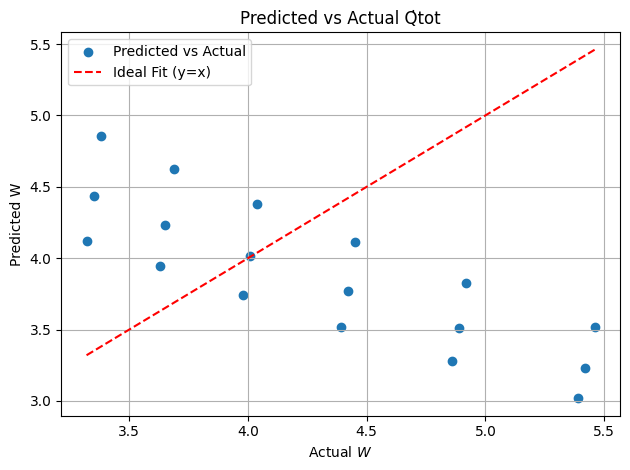

In [105]:
plt.scatter(W_wet, W_pred_wet, label='Predicted vs Actual')
plt.plot([min(W_wet), max(W_wet)],
         [min(W_wet), max(W_wet)],
         color='red', linestyle='--', label='Ideal Fit (y=x)')

plt.xlabel('Actual $W$')
plt.ylabel('Predicted W')
plt.title('Predicted vs Actual Q̇tot')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

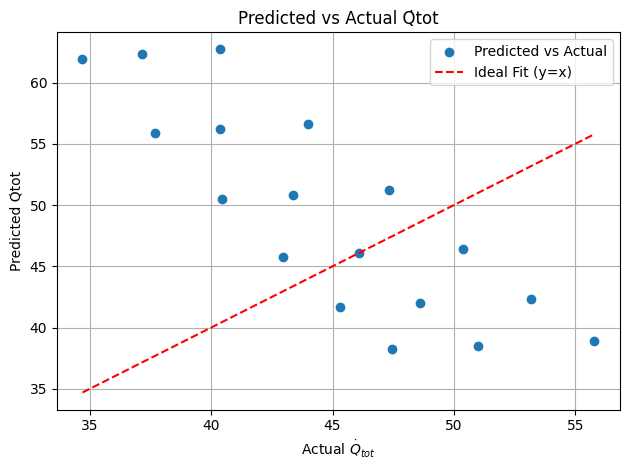

In [92]:
plt.scatter(Q_tot_wet, Q_tot_pred_wet, label='Predicted vs Actual')
plt.plot([min(Q_tot_wet), max(Q_tot_wet)],
         [min(Q_tot_wet), max(Q_tot_wet)],
         color='red', linestyle='--', label='Ideal Fit (y=x)')

plt.xlabel('Actual $\dot{Q}_{tot}$')
plt.ylabel('Predicted Q̇tot')
plt.title('Predicted vs Actual Q̇tot')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()